# MEDICAL INSURANCE PRICE PREDICTION

Import necessary libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df=pd.read_csv("insurance.csv")

df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [102]:
df['bmi'].min()

np.float64(15.96)

In [103]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [105]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [106]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [107]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [108]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

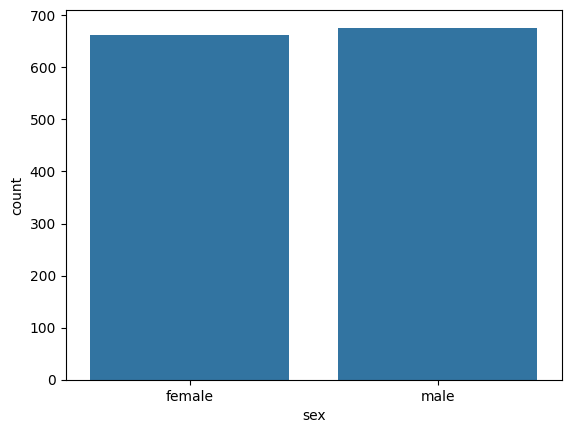

In [109]:
sns.countplot(x=df['sex'])

In [110]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [111]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

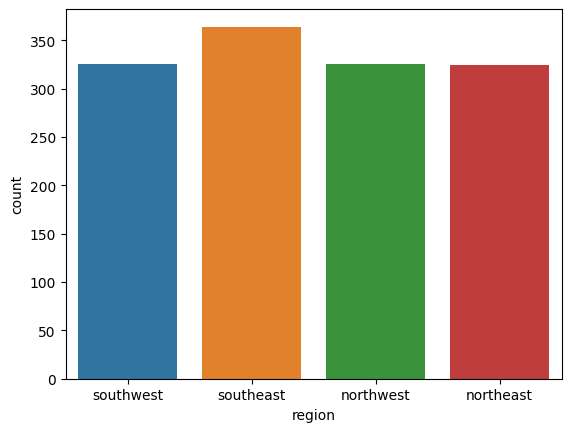

In [112]:
sns.countplot(x=df['region'],hue=df['region'])


In [113]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [114]:
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [115]:
df['sex'].nunique()

2

In [116]:
# #Encoding
# # One hot Encoding and Label encoding

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
dict={}

for i in df:
    if df[i].dtype==object and df[i].nunique()<=2:
        dict[i]=LabelEncoder()
        df[i]=dict[i].fit_transform(df[i])
    elif (df[i].dtype==object and df[i].nunique()>2):
        dict[i]=OneHotEncoder(sparse_output=False,drop='first')
        res=dict[i].fit_transform(df[[i]])


In [117]:
res

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], shape=(1338, 3))

In [118]:
dict['region'].transform([['northeast']])

dict['region'].get_feature_names_out()

res=pd.DataFrame(res,columns=dict['region'].get_feature_names_out())
res

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


,region_northwest,region_southeast,region_southwest
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1333,1.0,0.0,0.0
1334,0.0,0.0,0.0
1335,0.0,1.0,0.0
1336,0.0,0.0,1.0


In [119]:
df1=df.join(res)
df1.drop(['region'],axis=1,inplace=True)
df1

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,1.0


In [120]:
df1.isna().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [121]:
# #Encoding

# df1=pd.get_dummies(df,drop_first=True,dtype=int)
# df1

In [122]:
df1.corr(numeric_only=True)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


In [123]:
#Heat Map

<Axes: >

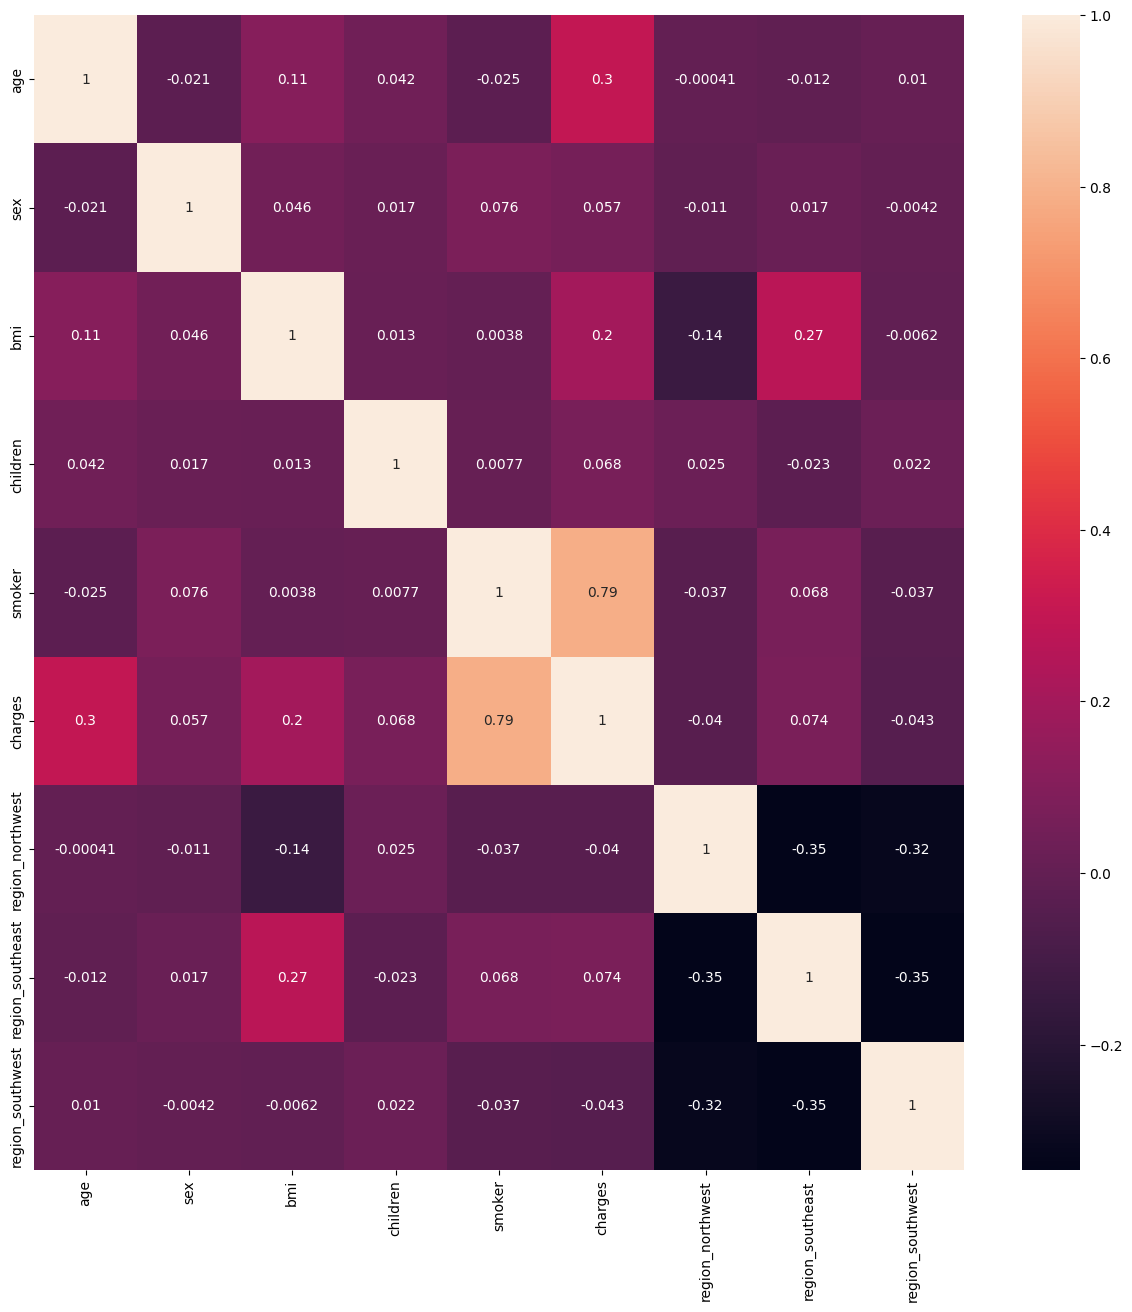

In [124]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(numeric_only=True),annot=True)

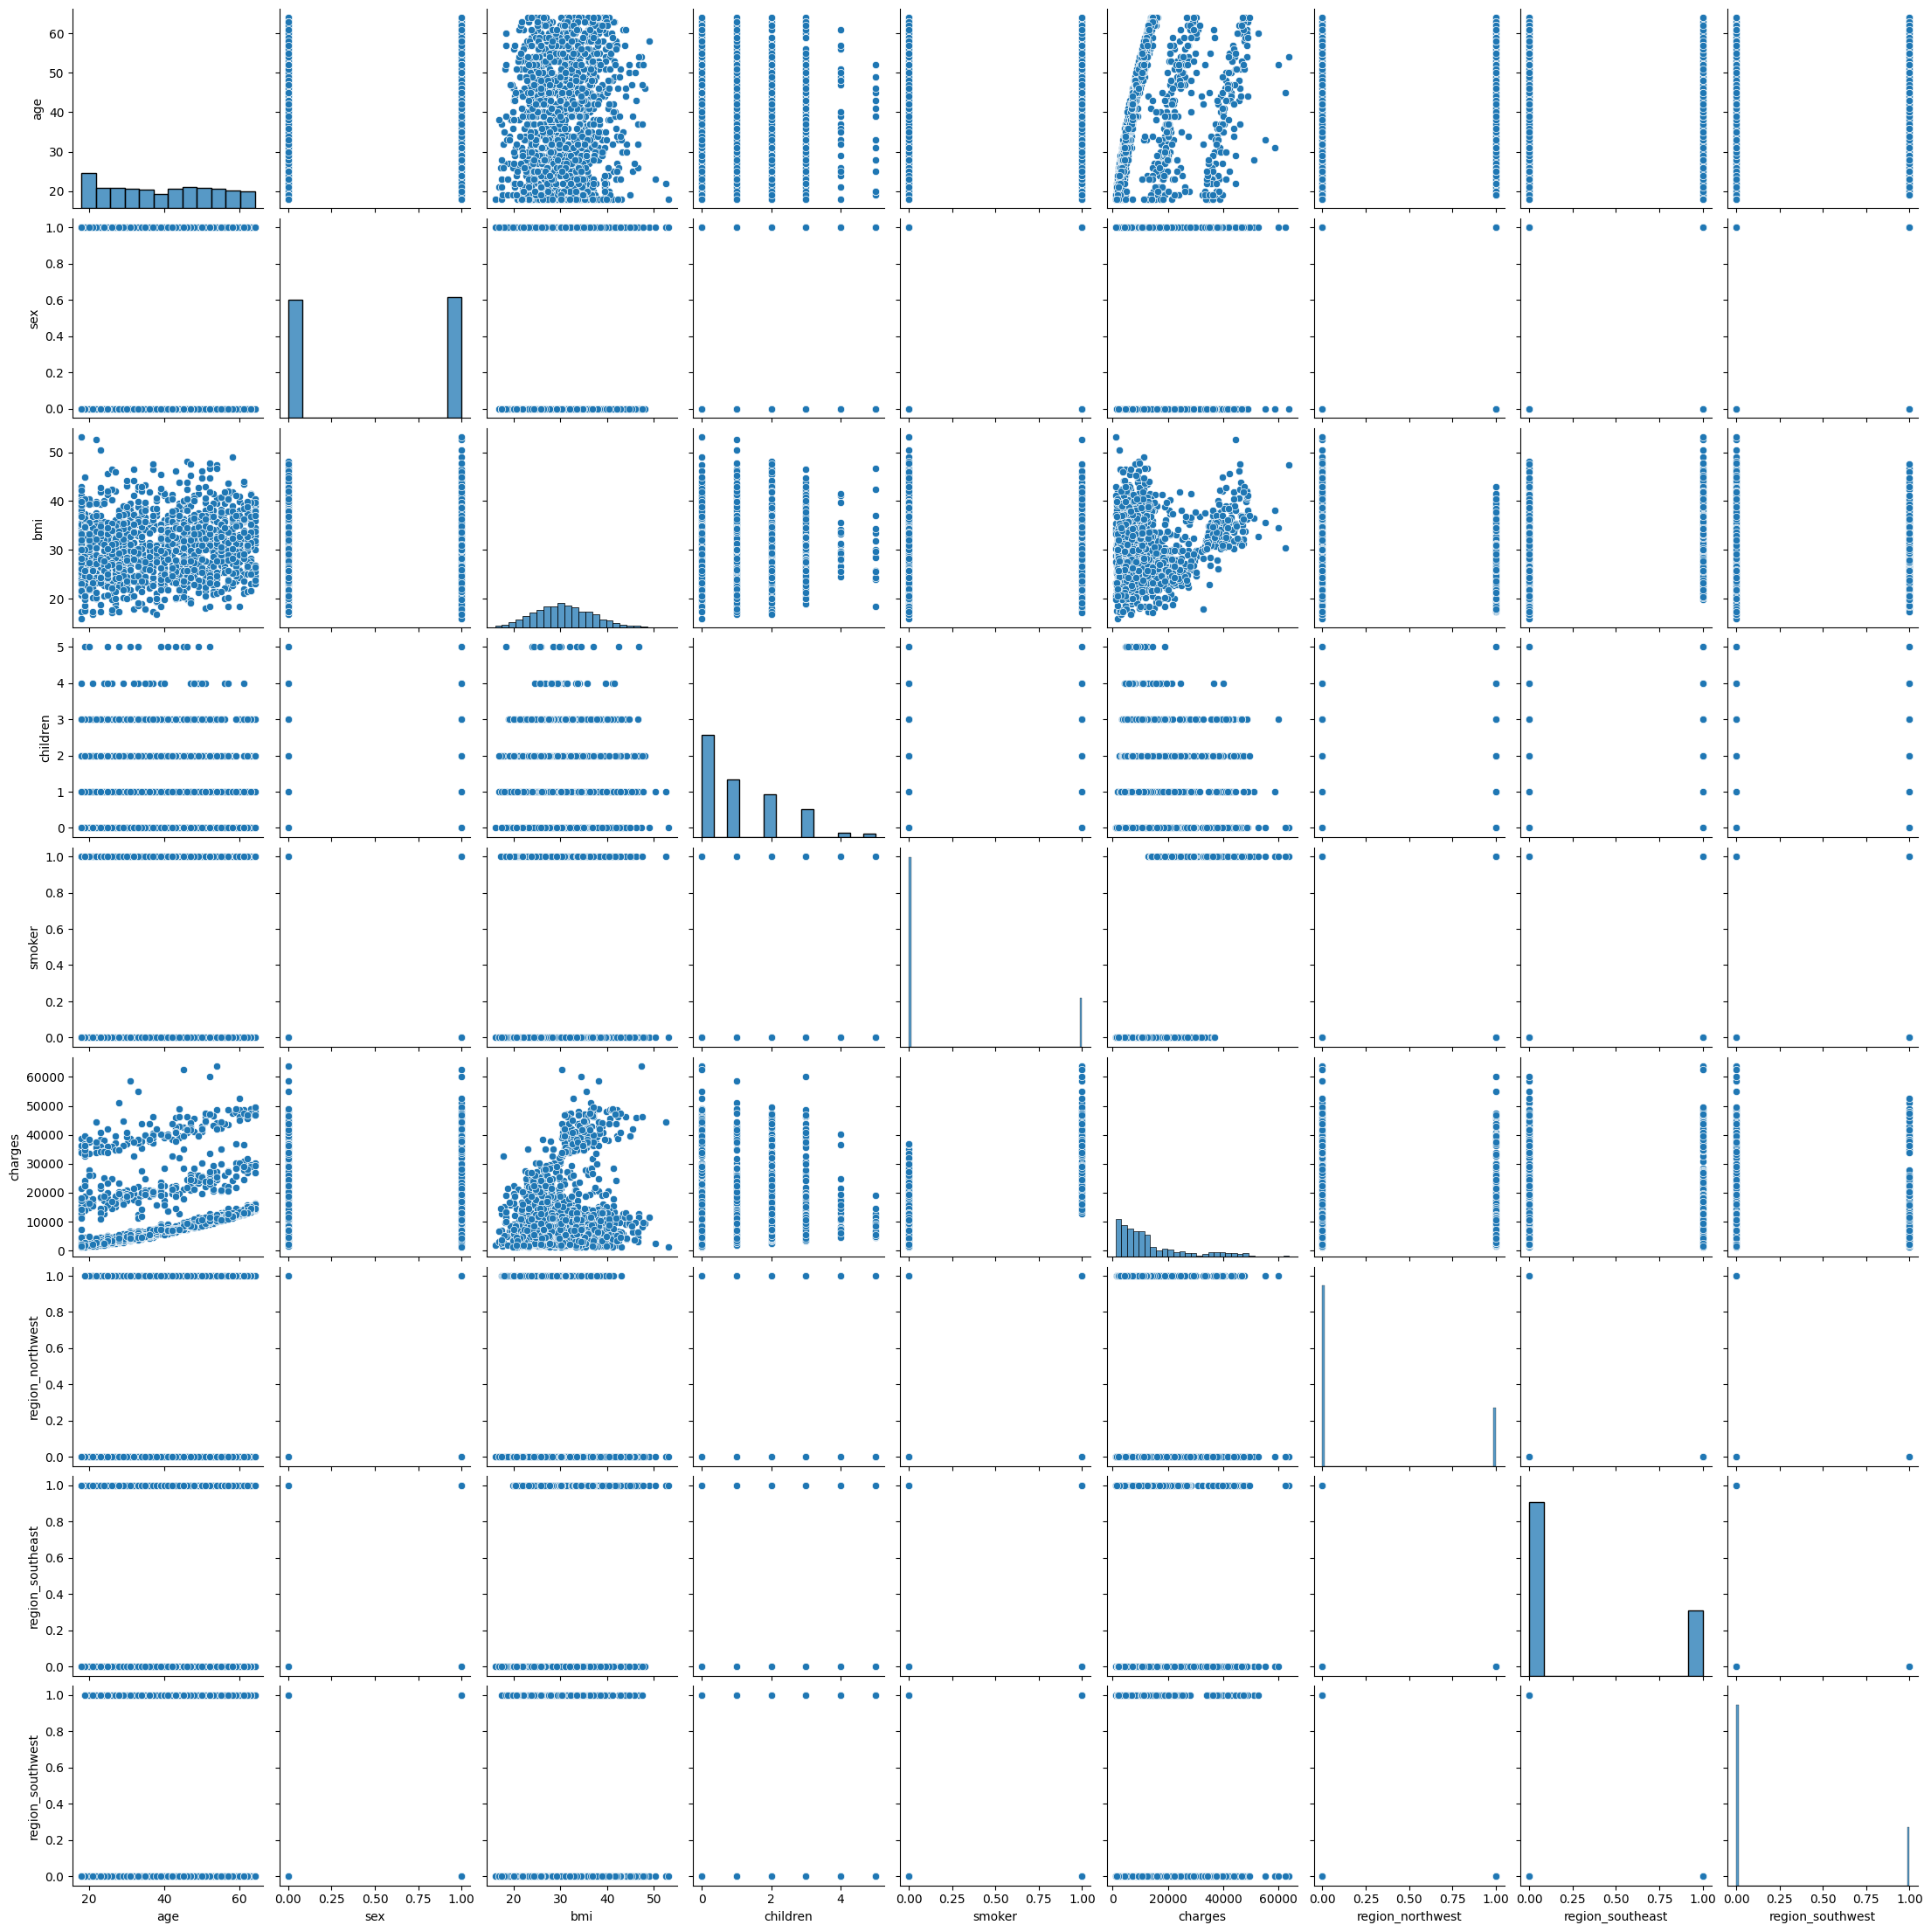

In [125]:
# Pair Plot

sns.pairplot(df1)

In [126]:
x=df1.drop("charges",axis=1) 
x

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0.0,0.0,1.0
1,18,1,33.770,1,0,0.0,1.0,0.0
2,28,1,33.000,3,0,0.0,1.0,0.0
3,33,1,22.705,0,0,1.0,0.0,0.0
4,32,1,28.880,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1.0,0.0,0.0
1334,18,0,31.920,0,0,0.0,0.0,0.0
1335,18,0,36.850,0,0,0.0,1.0,0.0
1336,21,0,25.800,0,0,0.0,0.0,1.0


In [127]:
y=df1['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [128]:
# Normalization

In [129]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.43876426, -1.0105187 , -0.45332   , ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.76548098,
        -0.61132367, -0.56641788]], shape=(1338, 8))

In [130]:
#Splitting into Training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [131]:
x_train.shape

(936, 8)

In [132]:
x_test.shape

(402, 8)

In [133]:
x_train


array([[ 1.55168573, -1.0105187 ,  0.081465  , ...,  1.76548098,
        -0.61132367, -0.56641788],
       [ 0.48366788,  0.98959079, -0.50253335, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.0532774 , -1.0105187 ,  0.20285792, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [ 1.33808216,  0.98959079, -0.90034121, ..., -0.56641788,
        -0.61132367, -0.56641788],
       [-0.15714284, -1.0105187 ,  2.77835626, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.12447859,  0.98959079, -0.12523104, ..., -0.56641788,
        -0.61132367,  1.76548098]], shape=(936, 8))

In [134]:
# Model Creation and Evaluation

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_squared_error

models=[LinearRegression(),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),XGBRegressor()]

In [135]:
for i in models:
    print(f".......{i}......")
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i.score(x_train,y_train))

    print(f"R2_Score :\n {r2_score(y_test,y_pred)}")
    print(f"MAPE :\n {mean_absolute_percentage_error(y_test,y_pred)}")
    print(f"RMSE :\n {np.sqrt(mean_squared_error(y_test,y_pred))}")
    print("*"*100)
    

.......LinearRegression()......
0.7423980090600258
R2_Score :
 0.769611805436901
MAPE :
 0.43585625991943555
RMSE :
 5812.100272258872
****************************************************************************************************
.......SVR()......
-0.09777169872647873
R2_Score :
 -0.07949935547774833
MAPE :
 1.032424727082967
RMSE :
 12580.971578899622
****************************************************************************************************
.......DecisionTreeRegressor()......
1.0
R2_Score :
 0.708764970328015
MAPE :
 0.3695390401339906
RMSE :
 6534.687036131118
****************************************************************************************************
.......RandomForestRegressor()......
0.9753205426136787
R2_Score :
 0.8549546427131758
MAPE :
 0.327631544187411
RMSE :
 4611.634756291617
****************************************************************************************************
.......GradientBoostingRegressor()......
0.9040438648684497
R2_Score :
 

In [136]:
# from we take decision that gradient boosting have high r2 score so we use gradient boosting for rest of model prediction

model=GradientBoostingRegressor()

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(model.score(x_train,y_train))
print(f"R2_Score :\n {r2_score(y_test,y_pred)}")
print(f"MAPE :\n {mean_absolute_percentage_error(y_test,y_pred)}")


0.9040438648684497
R2_Score :
 0.8652585062071033
MAPE :
 0.2857268493660421


In [137]:
# Cross Valiadiation

from sklearn.model_selection import cross_val_score
cross_val_score(model,x,y,cv=5).mean()

np.float64(0.8551038204846535)

In [138]:
dict1={'model': model,'encode':dict,'scaler':scaler}
dict1

{'model': GradientBoostingRegressor(),
 'encode': {'sex': LabelEncoder(),
  'smoker': LabelEncoder(),
  'region': OneHotEncoder(drop='first', sparse_output=False)},
 'scaler': StandardScaler()}

In [139]:
import joblib
joblib.dump(dict1,'medical_insurance.pkl')

['medical_insurance.pkl']

In [140]:
data1=joblib.load('medical_insurance.pkl')
data1

{'model': GradientBoostingRegressor(),
 'encode': {'sex': LabelEncoder(),
  'smoker': LabelEncoder(),
  'region': OneHotEncoder(drop='first', sparse_output=False)},
 'scaler': StandardScaler()}